<a href="https://colab.research.google.com/github/ashkan-motamedifar/customer-basket-clustering/blob/main/customer_basket_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [2]:
sns.set(style="darkgrid")

In [3]:
uploaded = files.upload()

Saving clustering.csv to clustering.csv


In [5]:
df = pd.read_csv("clustering.csv")
df

,item_count,total_spent
0,5.836904,88.755376
1,6.892701,105.942543
2,8.135037,106.716521
3,2.607892,101.988144
4,3.404051,130.630637
...,...,...
345,7.057923,25.850665
346,6.948490,168.120786
347,2.536582,111.012733
348,5.103831,117.312164


In [6]:
scaler = StandardScaler()
dfs = scaler.fit_transform(df)

In [16]:
model = KMeans(n_clusters=2, random_state=42, n_init=10)

In [17]:
labels = model.fit_predict(dfs)

In [18]:
df['cluster'] = labels
df

,item_count,total_spent,cluster
0,5.836904,88.755376,1
1,6.892701,105.942543,1
2,8.135037,106.716521,1
3,2.607892,101.988144,0
4,3.404051,130.630637,0
...,...,...,...
345,7.057923,25.850665,1
346,6.948490,168.120786,0
347,2.536582,111.012733,0
348,5.103831,117.312164,1


In [19]:
model.inertia_

298.6565874031179

In [20]:
model.cluster_centers_

array([[-0.95562535,  0.77329691],
       [ 0.72512276, -0.58677303]])

In [21]:
centroids = scaler.inverse_transform(model.cluster_centers_)
centroids

array([[  2.98701153, 155.93244588],
       [  8.02713117,  96.0198189 ]])

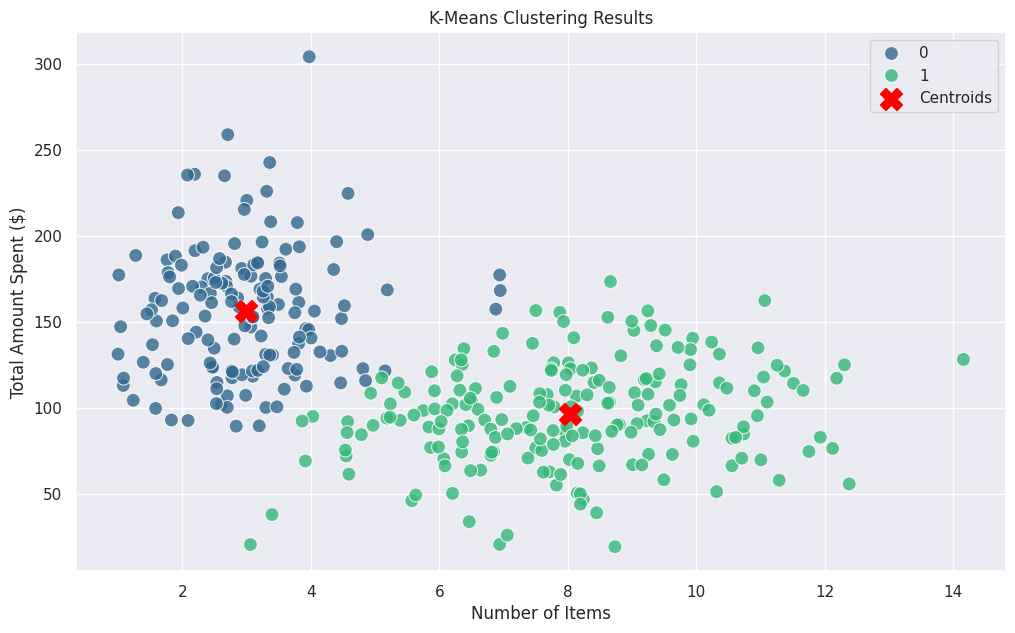

In [22]:
plt.figure(figsize=(12, 7))

sns.scatterplot(data=df, x='item_count', y='total_spent', hue='cluster', palette='viridis', s=100, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=250, marker='X', label='Centroids')

plt.title('K-Means Clustering Results')
plt.xlabel('Number of Items')
plt.ylabel('Total Amount Spent ($)')
plt.legend()
plt.grid(True)
plt.show()

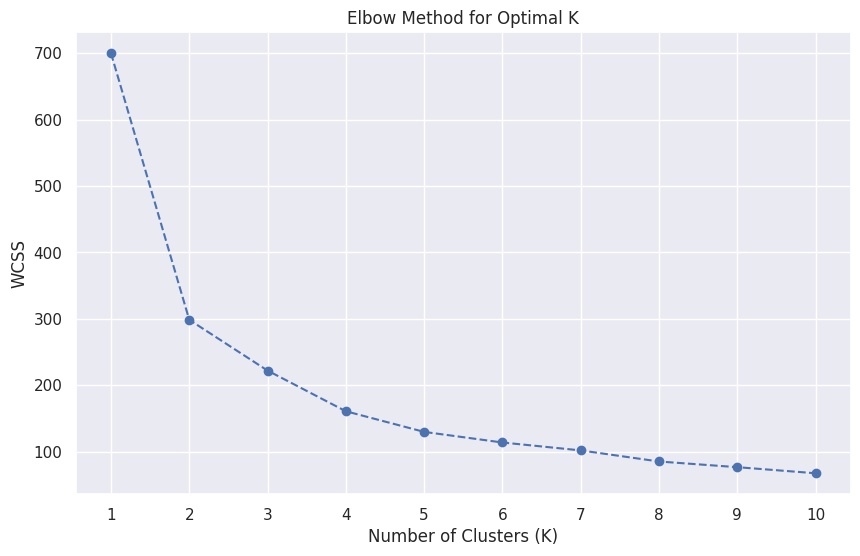

In [23]:
wcss = []
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42, n_init='auto')
    model.fit(dfs)
    wcss.append(model.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [24]:
y_kmeans = labels

In [30]:
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_agglo = agglo.fit_predict(dfs)

In [31]:
dbscan = DBSCAN(eps=0.15, min_samples=5)
y_dbscan = dbscan.fit_predict(dfs)

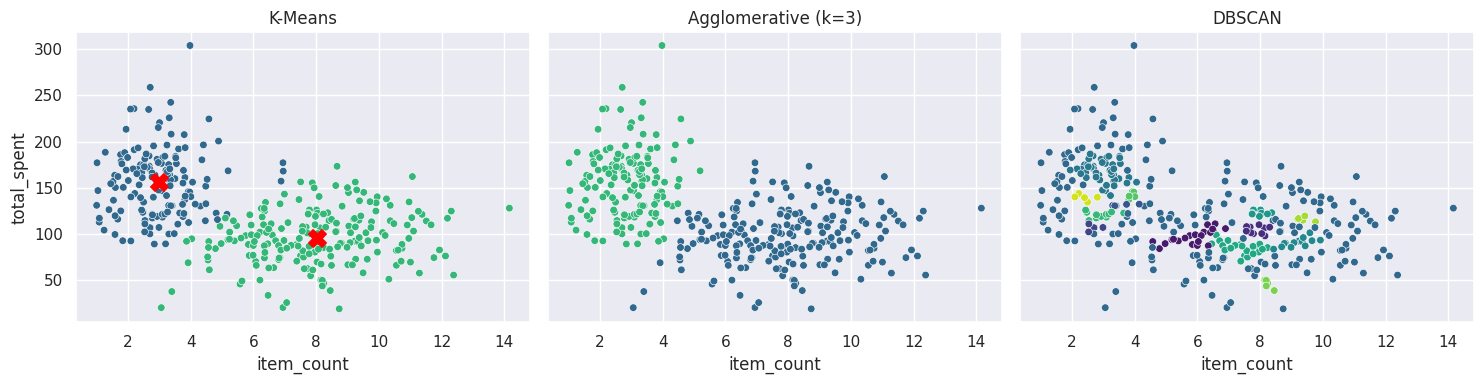

In [32]:
plot_df = df[['item_count', 'total_spent']].copy()
plot_df['kmeans'] = labels
plot_df['agglo']  = y_agglo
plot_df['dbscan'] = y_dbscan

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

# K-Means
sns.scatterplot(data=plot_df, x='item_count', y='total_spent',
                hue='kmeans', palette='viridis', s=30, ax=axes[0], legend=False)
axes[0].scatter(centroids[:, 0], centroids[:, 1], c='red', s=160, marker='X', label='Centroids')
axes[0].set_title('K-Means')

# Agglomerative
sns.scatterplot(data=plot_df, x='item_count', y='total_spent',
                hue='agglo', palette='viridis', s=30, ax=axes[1], legend=False)
axes[1].set_title('Agglomerative (k=3)')

# DBSCAN (show noise clearly)
plot_df['_db'] = plot_df['dbscan'].map(lambda v: 'Noise' if v == -1 else f'C{v}')
sns.scatterplot(data=plot_df, x='item_count', y='total_spent',
                hue='_db', palette='viridis', s=30, ax=axes[2], legend=False)
axes[2].set_title('DBSCAN')

for ax in axes:
    ax.set_xlabel('item_count')
    ax.set_ylabel('total_spent')

plt.tight_layout()
plt.show()